## **Connected with Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


<br/>

## **Importing necessary modules**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN

<br/>

## **Load the dataset**

In [3]:
df = pd.read_csv('drive/My Drive/Datasets/full.csv')

<br/>

## **Reconnaissance**

<br/>
<br/>

##### **First few rows**

In [4]:
df.head()

,Date,Day,Day 2,Time,Precipitation (avg mm per day),Temperature (0C),R. Weather,H. Weather,Flow
0,1/1/17 0:00,7,3,24,0,5,1,0.0,288
1,1/1/17 1:00,7,3,1,0,5,1,0.0,312
2,1/1/17 2:00,7,3,2,0,5,0,1.0,379
3,1/1/17 3:00,7,3,3,0,4,0,1.0,549
4,1/1/17 4:00,7,3,4,0,4,0,1.0,1001


<br/>

#### **Last few rows**

In [5]:
df.tail()

,Date,Day,Day 2,Time,Precipitation (avg mm per day),Temperature (0C),R. Weather,H. Weather,Flow
4339,6/30/17 19:00,5,1,19,0,13,0,1.0,3152
4340,6/30/17 20:00,5,1,20,0,13,0,1.0,2551
4341,6/30/17 21:00,5,1,21,0,13,0,1.0,2203
4342,6/30/17 22:00,5,1,22,0,10,0,1.0,2011
4343,6/30/17 23:00,5,1,23,0,8,0,1.0,1810


<br/>

##### **Shape**

In [6]:
df.shape

(4344, 9)

<br/>

#### **Data types**

In [7]:
df.dtypes

Date                               object
Day                                 int64
Day 2                               int64
Time                                int64
Precipitation (avg mm per day)      int64
Temperature (0C)                    int64
R. Weather                         object
H. Weather                        float64
Flow                                int64
dtype: object

<br/>

#### **Plot the 'Flow' feature**

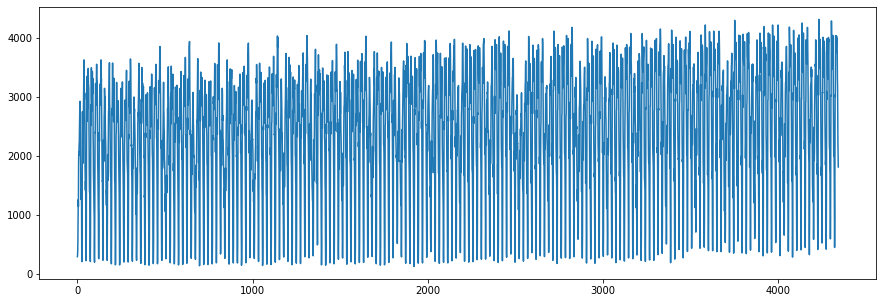

In [8]:
plt.figure(figsize = (15, 5))
plt.plot(df['Flow'])

plt.show()

<br/>

## **Feature Engineering**

<br/>
<br/>

#### **ADF Test**

In [9]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(flow):
    result = adfuller(flow)
    labels = ['ADF test statistics', 'P-value', '#Lags used', 'Number of observation used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary')
    else:
        print('Weak evidence against the null hypothesis (Ho), time series has a unit root, indicating it is non stationary. ')
        
        
adfuller_test(df['Flow'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF test statistics : -9.634945877821467
P-value : 1.5756744416440318e-16
#Lags used : 31
Number of observation used : 4312
Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary


<br/>

#### **Change the data type of 'Date'**

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.dtypes

Date                              datetime64[ns]
Day                                        int64
Day 2                                      int64
Time                                       int64
Precipitation (avg mm per day)             int64
Temperature (0C)                           int64
R. Weather                                object
H. Weather                               float64
Flow                                       int64
dtype: object

<br/>

#### **Set the 'Date' column to Index**

In [12]:
df1 = df.set_index('Date')

<br/>

#### **Renaming the column names**

In [13]:
df1.rename(columns={'Day 2': 'Day_2', 'Precipitation (avg mm per day)': 'Precipitation',
                   'Temperature (0C)' : 'Temperature', 'R. Weather' : 'R_Weather', 'H. Weather' : 'H_Weather'}, inplace=True)

In [14]:
df1.head(3)

,Day,Day_2,Time,Precipitation,Temperature,R_Weather,H_Weather,Flow
Date,,,,,,,,
2017-01-01 00:00:00,7,3,24,0,5,1,0.0,288
2017-01-01 01:00:00,7,3,1,0,5,1,0.0,312
2017-01-01 02:00:00,7,3,2,0,5,0,1.0,379


<br/>

#### **Checking the Null values**

In [15]:
df1.isnull().sum()

Day              0
Day_2            0
Time             0
Precipitation    0
Temperature      0
R_Weather        0
H_Weather        3
Flow             0
dtype: int64

<br/>

#### **Unique values**

In [16]:
col = list(df1.columns)

for i in col:
  print('Feature : {}\n{}\n\n'.format(i, df1[i].unique()))


Feature : Day
[7 1 2 3 4 5 6]


Feature : Day_2
[3 1 2]


Feature : Time
[24  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


Feature : Precipitation
[ 0  4  2  1  5  6  3  8 13 20 10  7]


Feature : Temperature
[ 5  4  3  2  0 -1  1  6  7  8  9 10 11 -2 -3 -4 -6 12 13 14 15 16 17 18
 19 20 21 22 23 24 25 26]


Feature : R_Weather
['1' '0' 'o']


Feature : H_Weather
[ 0.  1. nan]


Feature : Flow
[ 288  312  379 ... 4035 3953 1810]




<br/>

#### **Replace the 'o' with 0**

In [17]:
df1['R_Weather'].replace('o', '0', inplace=True)

In [18]:
df1['R_Weather'].unique()

array(['1', '0'], dtype=object)

<br/>

#### **Change the data type from object**

In [19]:
df1['R_Weather'] = pd.to_numeric(df1['R_Weather'])

In [20]:
df1.dtypes

Day                int64
Day_2              int64
Time               int64
Precipitation      int64
Temperature        int64
R_Weather          int64
H_Weather        float64
Flow               int64
dtype: object

In [21]:
df1['R_Weather'].unique()

array([1, 0])

<br/>

#### **Drop the other columns**

In [22]:
df1.drop(['Day', 'Day_2', 'Time', 'Precipitation', 'Temperature', 'R_Weather',
       'H_Weather'], axis = 1, inplace = True)

In [23]:
df1.head(5)

,Flow
Date,
2017-01-01 00:00:00,288
2017-01-01 01:00:00,312
2017-01-01 02:00:00,379
2017-01-01 03:00:00,549
2017-01-01 04:00:00,1001


In [24]:
df1.shape

(4344, 1)

<br/>

#### **Scaling**

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [26]:
df1

array([[0.03958035],
       [0.04530281],
       [0.06127802],
       ...,
       [0.49618503],
       [0.45040534],
       [0.40247973]])

<br/>

#### **Splitting into train and test set**

In [27]:
train_size = int(len(df1)*0.8343)
test_size = len(df1) - train_size

In [28]:
print(test_size)
print(train_size)

720
3624


In [29]:
train, test = df1[0:train_size, :], df1[train_size:len(df1), :1]

In [30]:
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [], []
  for i in range(len(dataset) - time_step -1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i+ time_step, 0])

  return np.array(dataX), np.array(dataY)

In [31]:
time_step = 7
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

In [32]:
print(X_train[0])
print('\n')
print(y_train[0])

[0.03958035 0.04530281 0.06127802 0.10181211 0.20958512 0.26990939
 0.24296614]


0.4170243204577968


In [33]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

<br/>

## **Clear Session**

In [34]:
#import tensorflow as tf
#tf.keras.backend.clear_session()

<br/>
<br/>

## **Model Architecture**

In [35]:
model = Sequential()

model.add(LSTM(50, return_sequences= True, activation = 'relu', input_shape = (7, 1)))
model.add(LSTM(50, return_sequences= True, activation = 'relu'))
model.add(LSTM(50))

model.add(Dense(1, activation='linear'))

<br/>

## **Callbacks**

In [36]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

callbacks = [EarlyStopping(patience = 10, verbose = 1),
             ReduceLROnPlateau(factor = 0.1, patience = 3, min_lr = 0.00001, verbose = 1),
             ModelCheckpoint('model.h5', verbose = 1, save_best_only = True, save_weights_only= True)]

<br/>

#### **Model Summary**

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 50)             10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 50)             20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


<br/>

## **Model Complie**

In [38]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

<br/>

## **Train the Model**

In [39]:
history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), batch_size = 64, verbose = 1, callbacks = callbacks)

Epoch 1/100
57/57 [==============================] - ETA: 0s - loss: 0.1124 - accuracy: 0.0000e+00
Epoch 00001: val_loss improved from inf to 0.06250, saving model to model.h5
57/57 [==============================] - 2s 39ms/step - loss: 0.1124 - accuracy: 0.0000e+00 - val_loss: 0.0625 - val_accuracy: 0.0000e+00
Epoch 2/100
57/57 [==============================] - ETA: 0s - loss: 0.0522 - accuracy: 2.7655e-04
Epoch 00002: val_loss improved from 0.06250 to 0.04727, saving model to model.h5
57/57 [==============================] - 2s 27ms/step - loss: 0.0522 - accuracy: 2.7655e-04 - val_loss: 0.0473 - val_accuracy: 0.0014
Epoch 3/100
55/57 [===========================>..] - ETA: 0s - loss: 0.0328 - accuracy: 2.8409e-04
Epoch 00003: val_loss improved from 0.04727 to 0.02705, saving model to model.h5
57/57 [==============================] - 2s 27ms/step - loss: 0.0328 - accuracy: 2.7655e-04 - val_loss: 0.0270 - val_accuracy: 0.0014
Epoch 4/100
56/57 [============================>.] - ETA: 

<br/>

## **Plot the model statistics**

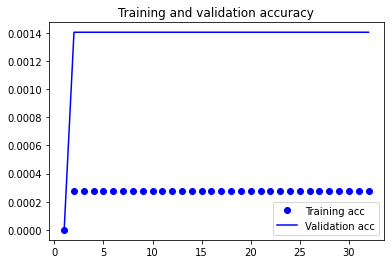

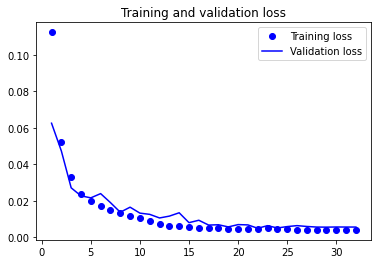

In [40]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

<br/>

## **Prediction**

In [41]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

<br/>

## **Reverse Scaling**

In [42]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

<br/>

## **Reshaping and Reverse scaling for Actual values**

In [43]:
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

y_train = y_train.reshape(-1, 1)
y_train = scaler.inverse_transform(y_train)

<br/>

## **Mean Squared Error**

In [44]:
import math
print('Training accuracy : {}\n'.format(math.sqrt(mean_squared_error(y_train, train_predict))))
print('Testing accuracy : {}'.format(math.sqrt(mean_squared_error(y_test, test_predict))))

Training accuracy : 264.1899773939851

Testing accuracy : 312.2578669954045


<br/>

## **Plot the actual and predicted values**

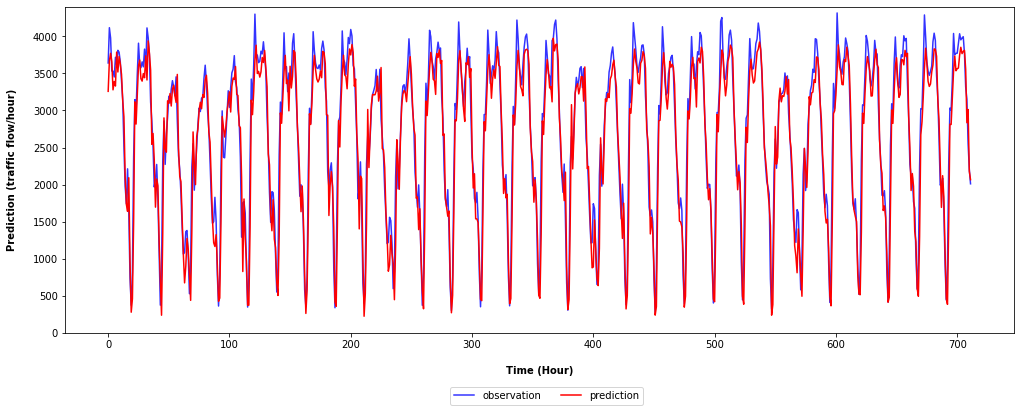

In [45]:
plt.figure(figsize = (17, 6))

plt.plot(y_test, color = 'blue', label = 'observation', alpha = 0.8)
plt.plot(test_predict, color = 'red', label = 'prediction')
plt.xlabel('\nTime (Hour)', fontweight="bold")
plt.ylabel('Prediction (traffic flow/hour)\n', fontweight="bold")
plt.ylim(0, 4400)
plt.legend(bbox_to_anchor=(0.615, -0.15), ncol = 2)
plt.show()

<br/>

## **Creating a DataFrame**

In [46]:
df_result = pd.DataFrame(np.c_[y_test, test_predict], columns = ['y_test', 'test_predict'])
df_result

,y_test,test_predict
0,3641.0,3258.350342
1,4117.0,3670.031494
2,3978.0,3771.070557
3,3533.0,3654.378662
4,3531.0,3278.681885
...,...,...
707,3317.0,3556.560547
708,3152.0,2835.040039
709,2551.0,3013.147461
710,2203.0,2179.135742


<br/>

## **Accuracy Score**

In [47]:
from sklearn.metrics import r2_score

print('Test Accuracy Score : {}'.format(r2_score(y_test, test_predict)))

print('\nTrain Accuracy Score : {}'.format(r2_score(y_train, train_predict)))

Test Accuracy Score : 0.9122214902056885

Train Accuracy Score : 0.9347910242885427


<br/>

## **Creating a ScatterPlot**

In [48]:
k = df_result['test_predict']
l = df_result['y_test']

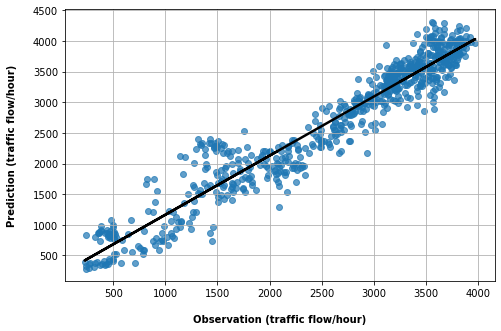

In [49]:
import matplotlib.ticker as plticker
plt.figure(figsize = (7.7, 5))
plt.scatter(k, l, alpha = 0.7)


z = np.polyfit(k, l, 1)
p = np.poly1d(z)
plt.plot(k,p(k),"k", linewidth = 2.5)

plt.xlabel('\nObservation (traffic flow/hour)', fontweight='bold')
plt.ylabel('Prediction (traffic flow/hour)\n', fontweight='bold')


plt.grid(True, which='major')


plt.show()
